In [1]:
# import pandas
import pandas as pd

In [2]:
# load bitcoin dataset
bitcoin_df = pd.read_csv('BTC-USD (2).csv')
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2431 non-null   object 
 1   Open       2431 non-null   float64
 2   High       2431 non-null   float64
 3   Low        2431 non-null   float64
 4   Close      2431 non-null   float64
 5   Adj Close  2431 non-null   float64
 6   Volume     2431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 133.1+ KB


In [4]:
# change the date to non-null datetime and set it as index
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], infer_datetime_format=True)
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,21401.044922,21646.203125,20955.138672,21528.087891,21528.087891,31878280659
2022-08-24,21526.455078,21783.076172,21195.005859,21395.019531,21395.019531,31962253368
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,21600.904297,31028679593
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,20260.019531,42326789564
2022-08-27,20236.427734,20334.722656,20036.839844,20201.615234,20201.615234,43881558016


In [5]:
# detect missing values
bitcoin_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
bitcoin_df = bitcoin_df.loc[:, ['Close']]
bitcoin_df.tail()

,Close
Date,
2022-08-23,21528.087891
2022-08-24,21395.019531
2022-08-25,21600.904297
2022-08-26,20260.019531
2022-08-27,20201.615234


In [7]:
ethereum_df = pd.read_csv('ETH-USD (1).csv')
ethereum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [8]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [9]:
ethereum_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], infer_datetime_format=True)
ethereum_df.set_index('Date', inplace=True)
ethereum_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-23,1622.939331,1666.676514,1569.428589,1662.769897,1662.769897,18322041914
2022-08-24,1662.695435,1686.557739,1610.099243,1657.059204,1657.059204,16780932907
2022-08-25,1657.336548,1718.183228,1656.856079,1696.457031,1696.457031,14818795695
2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143
2022-08-27,1505.448120,1516.847046,1478.902466,1503.878052,1503.878052,27216099328


In [11]:
ethereum_df = ethereum_df.loc[:, ['Close']]
ethereum_df.tail()

,Close
Date,
2022-08-23,1662.769897
2022-08-24,1657.059204
2022-08-25,1696.457031
2022-08-26,1507.782837
2022-08-27,1503.878052


In [12]:
tether_df = pd.read_csv('USDT-USD (1).csv')
tether_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
3,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
4,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032


In [13]:
tether_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1753 non-null   object 
 1   Open       1753 non-null   float64
 2   High       1753 non-null   float64
 3   Low        1753 non-null   float64
 4   Close      1753 non-null   float64
 5   Adj Close  1753 non-null   float64
 6   Volume     1753 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.0+ KB


In [14]:
tether_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
tether_df['Date'] = pd.to_datetime(tether_df['Date'], infer_datetime_format=True)
tether_df.set_index('Date', inplace=True)
tether_df = tether_df.loc[:, ['Close']]
tether_df.tail()

,Close
Date,
2022-08-23,0.999992
2022-08-24,1.000039
2022-08-25,1.000080
2022-08-26,1.000043
2022-08-27,1.000083


In [16]:
joined_df = bitcoin_df.join(ethereum_df, how='outer', rsuffix=' Ethereum').join(tether_df, how='outer', rsuffix=' Tether')
joined_df.dropna(inplace=True)
joined_df

,Close,Close Ethereum,Close Tether
Date,,,
2017-11-09,7143.580078,320.884003,1.008180
2017-11-10,6618.140137,299.252991,1.006010
2017-11-11,6357.600098,314.681000,1.008990
2017-11-12,5950.069824,307.907990,1.012470
2017-11-13,6559.490234,316.716003,1.009350
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [17]:
joined_df.isnull().sum()

Close             0
Close Ethereum    0
Close Tether      0
dtype: int64

In [18]:
joined_df.ffill()
df = joined_df.rename(columns={"Close" : "Close Bitcoin"})
df = df['2018':]
df

,Close Bitcoin,Close Ethereum,Close Tether
Date,,,
2018-01-01,13657.200195,772.640991,1.007280
2018-01-02,14982.099609,884.443970,1.004900
2018-01-03,15201.000000,962.719971,1.013440
2018-01-04,15599.200195,980.921997,1.002530
2018-01-05,17429.500000,997.719971,0.998634
...,...,...,...
2022-08-23,21528.087891,1662.769897,0.999992
2022-08-24,21395.019531,1657.059204,1.000039
2022-08-25,21600.904297,1696.457031,1.000080


In [19]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27'],
              dtype='datetime64[ns]', name='Date', length=1700, freq=None)

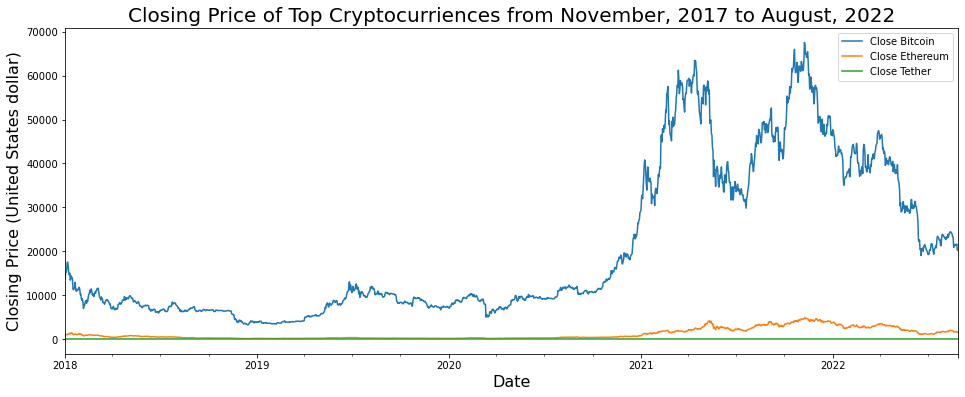

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(figsize=(16,6))
ax.set_ylabel('Closing Price (United States dollar)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Closing Price of Top Cryptocurriences from November, 2017 to August, 2022', fontsize=20)
plt.show;

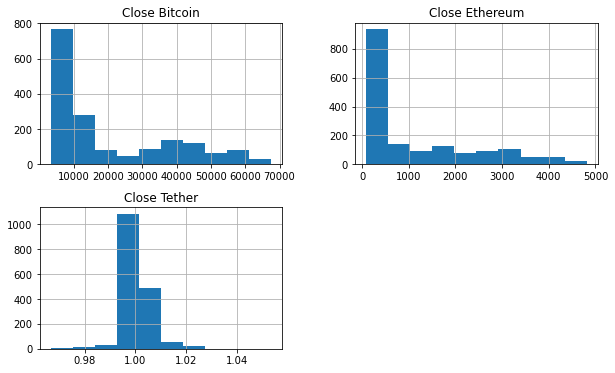

In [21]:
df.hist(figsize=(10,6));

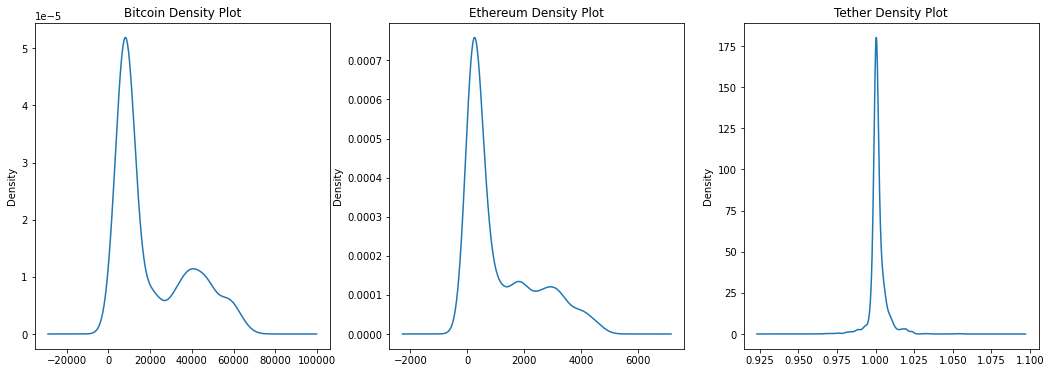

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
df['Close Bitcoin'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
df['Close Ethereum'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Close Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

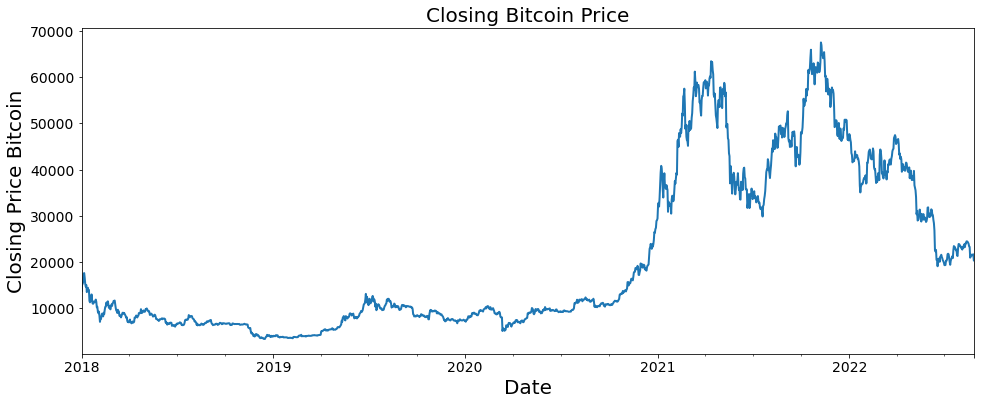

In [23]:
df['Close Bitcoin'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price Bitcoin', fontsize=20)
plt.title('Closing Bitcoin Price', fontsize=20);

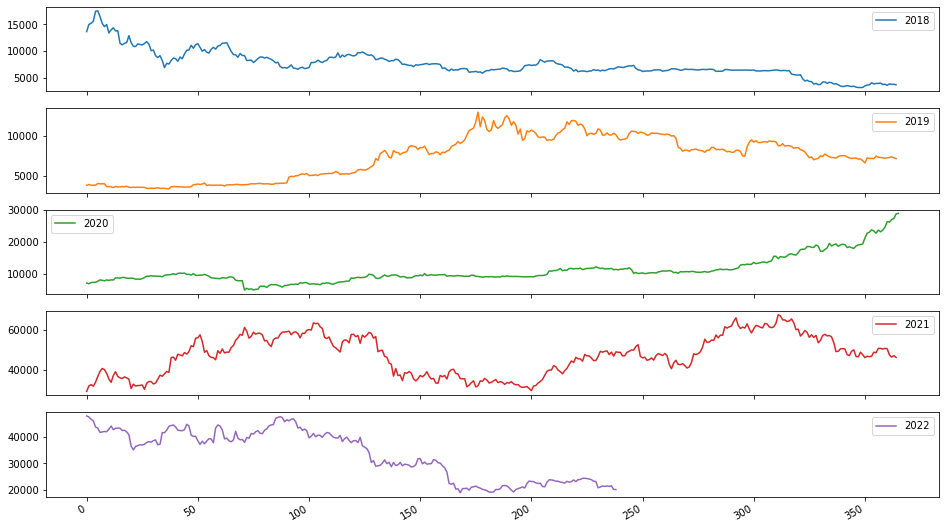

In [25]:
bitcoin = df['Close Bitcoin']
groups_yearly = bitcoin.groupby(pd.Grouper(freq='A'))
year_bitcoin = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly], axis=1)
year_df_bitcoin = pd.DataFrame(year_bitcoin)
year_df_bitcoin.columns = ['2018', '2019', '2020', '2021', '2022']
year_df_bitcoin.plot(figsize=(16,10), subplots=True, legend=True);

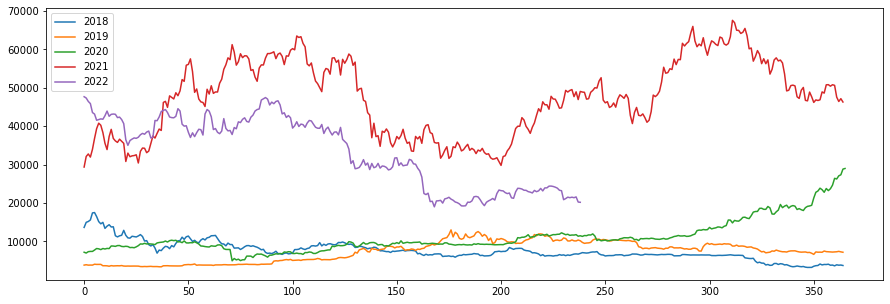

In [26]:
year_df_bitcoin.plot(figsize = (15,5), subplots=False, legend=True);

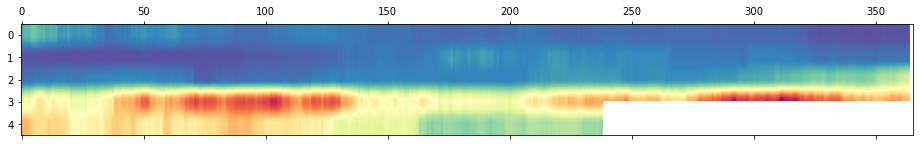

In [74]:
year_matrix = year_df_bitcoin.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

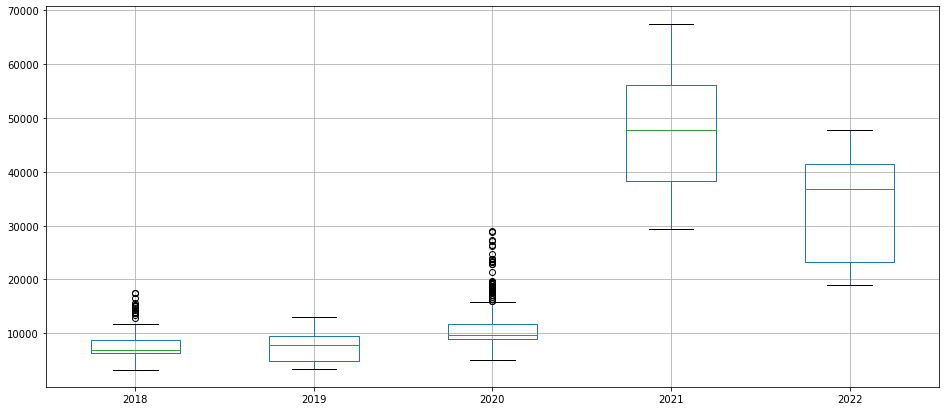

In [27]:
year_df_bitcoin.boxplot(figsize=(16,7));

In [28]:
cutoff_bitcoin = round(df['Close Bitcoin'].shape[0]*0.8)
cutoff_bitcoin

1360

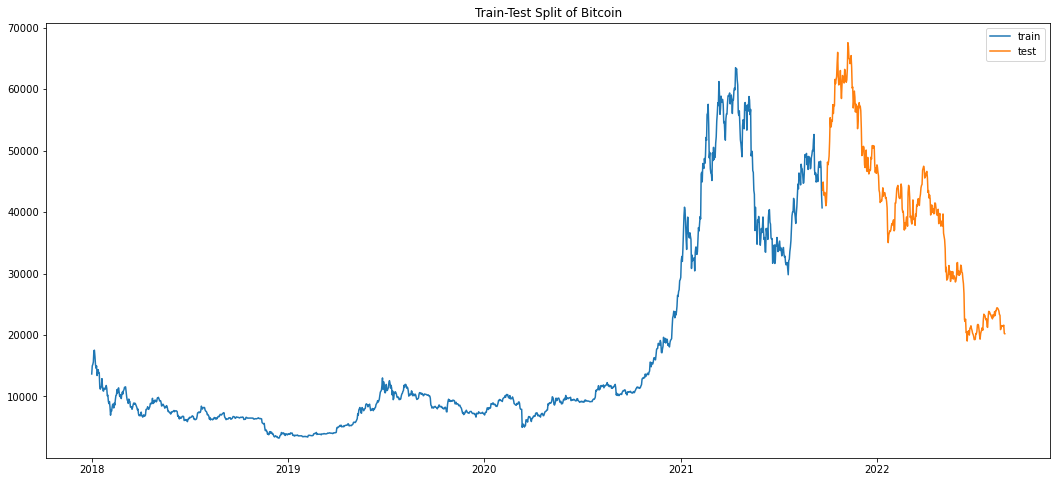

In [29]:
train_bitcoin = df['Close Bitcoin'][:cutoff_bitcoin]
test_bitcoin = df['Close Bitcoin'][cutoff_bitcoin:]
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

In [30]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()
for train_ind, val_ind in split.split(train_bitcoin):
    print(train_ind, val_ind)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229] [230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 2

Bitcoin Baseline Model

In [31]:
baseline_bitcoin = train_bitcoin.shift(1)
baseline_bitcoin

Date
2018-01-01             NaN
2018-01-02    13657.200195
2018-01-03    14982.099609
2018-01-04    15201.000000
2018-01-05    15599.200195
                  ...     
2021-09-17    47783.359375
2021-09-18    47267.519531
2021-09-19    48278.363281
2021-09-20    47260.218750
2021-09-21    42843.800781
Name: Close Bitcoin, Length: 1360, dtype: float64

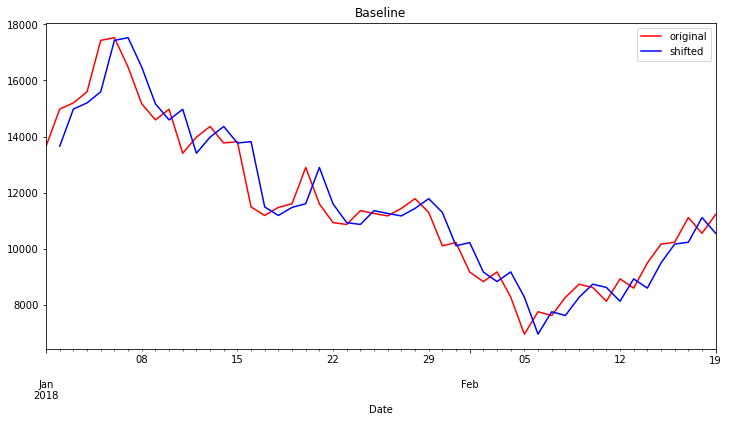

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
train_bitcoin[0:50].plot(ax=ax, c='r', label='original')
baseline_bitcoin[0:50].plot(ax=ax, c='b', label='shifted')
ax.set_title('Baseline')
ax.legend();

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_bitcoin[1:], baseline_bitcoin.dropna()))

919.5902315711276

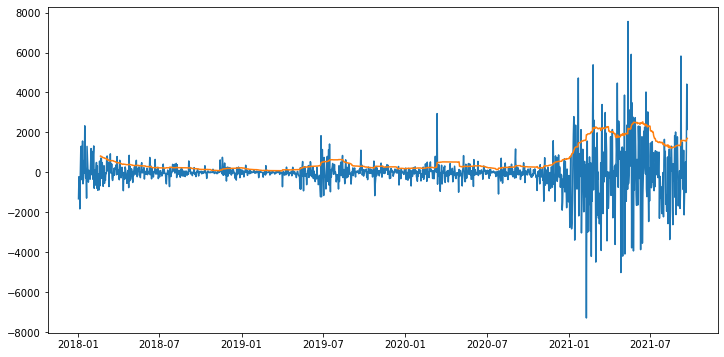

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
residuals_bitcoin = baseline_bitcoin[1:] - train_bitcoin[1:]
ax.plot(residuals_bitcoin.index, residuals_bitcoin)
ax.plot(residuals_bitcoin.index, residuals_bitcoin.rolling(50).std());

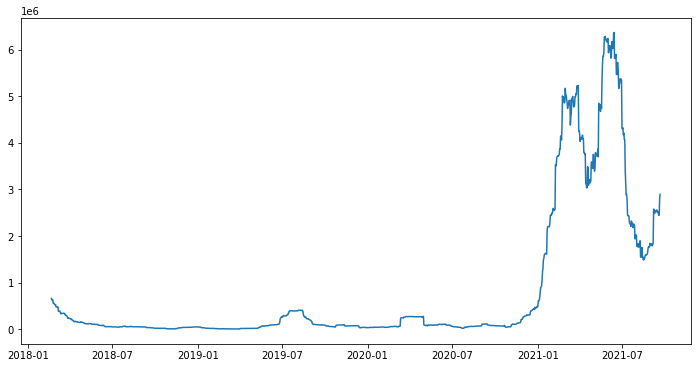

In [35]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(residuals_bitcoin.index, residuals_bitcoin.rolling(50).var());

Rolling standard deviation varies at different points in time. Tha is the result of the trends in the data.

In [36]:
def stationarity_check(DF):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = DF.rolling(window=8, center=False).mean()
    roll_std = DF.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(DF) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(16,6))
    orig = plt.plot(DF, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


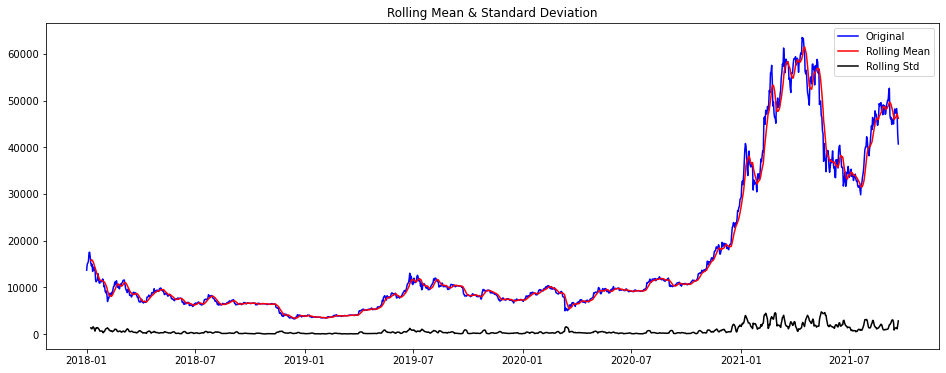

Results of Dickey-Fuller Test: 

Test Statistic                   -0.599934
p-value                           0.870997
#Lags Used                       24.000000
Number of Observations Used    1335.000000
Critical Value (1%)              -3.435258
Critical Value (5%)              -2.863707
Critical Value (10%)             -2.567924
dtype: float64


In [37]:
stationarity_check(train_bitcoin)

Bitcoin is not stationary.

Use differencing to see if the series becomes stationary

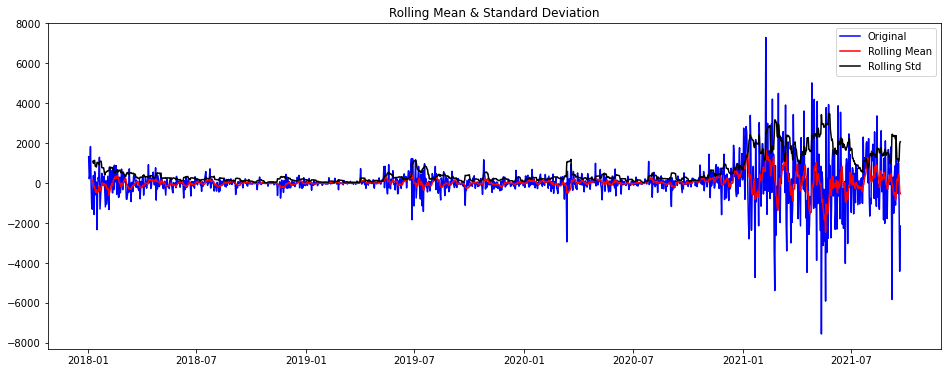

Results of Dickey-Fuller Test: 

Test Statistic                -7.181121e+00
p-value                        2.648272e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.335000e+03
Critical Value (1%)           -3.435258e+00
Critical Value (5%)           -2.863707e+00
Critical Value (10%)          -2.567924e+00
dtype: float64


In [38]:
bitcoin_train_diff = train_bitcoin.diff(periods=1)
bitcoin_train_diff.dropna(inplace=True)
stationarity_check(bitcoin_train_diff)

The bitcoin time series looks stationary now and is ready for modelling

Random Walk Model for Bitcoin

In [39]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
random_walk_model_bitcoin = ARIMA(train_bitcoin, order=(0,1,0)).fit()
y_hat_rw = random_walk_model_bitcoin.predict(typ='levels')
y_hat_rw

2018-01-01        0.000000
2018-01-02    13657.200195
2018-01-03    14982.099609
2018-01-04    15201.000000
2018-01-05    15599.200195
                  ...     
2021-09-17    47783.359375
2021-09-18    47267.519531
2021-09-19    48278.363281
2021-09-20    47260.218750
2021-09-21    42843.800781
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [40]:
random_walk_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11202.056
Date:                Mon, 29 Aug 2022   AIC                          22406.112
Time:                        05:38:00   BIC                          22411.327
Sample:                    01-01-2018   HQIC                         22408.064
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.45e+05   1.11e+04     75.795      0.000    8.23e+05    8.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.26   Jarque-Bera (JB):             12633.83
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              19.02   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_rw))

991.0453092619374

In [42]:
train_bitcoin_with_ind = train_bitcoin.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2025.3055250690218
5068.898602547114
1365.8540041819417
12235.638534664951
11594.694137143915


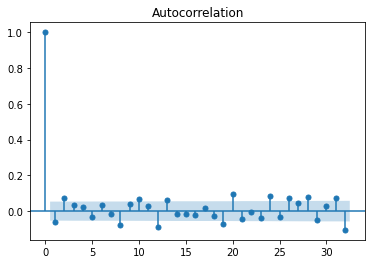

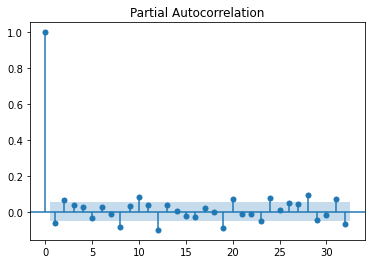

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bitcoin_train_diff)
plot_pacf(bitcoin_train_diff);

AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 8 lags the AR is significant. Which means, we can use AR = 8. AR = 12 is another option.

The series show negative significant correlation at lags 8 and 12, which suggests adding MA terms equal to 8 and 12.

In [44]:
ar_8_bitcoin = ARIMA(train_bitcoin, order=(8,1,0)).fit()
y_hat_ar8 = ar_8_bitcoin.predict(typ='levels')
y_hat_ar8

2018-01-01        0.000000
2018-01-02    13343.555058
2018-01-03    15364.701715
2018-01-04    15562.095999
2018-01-05    15862.071237
                  ...     
2021-09-17    47939.311438
2021-09-18    47559.377255
2021-09-19    48081.727041
2021-09-20    47324.363636
2021-09-21    43102.471449
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [45]:
ar_8_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(8, 1, 0)   Log Likelihood              -11188.268
Date:                Mon, 29 Aug 2022   AIC                          22394.536
Time:                        05:38:54   BIC                          22441.466
Sample:                    01-01-2018   HQIC                         22412.105
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0511      0.016     -3.241      0.001      -0.082      -0.020
ar.L2          0.0729      0.015      4.746      0.000       0.043       0.103
ar.L3          0.0454      0.016      2.903      0.004       0.015       0.076
ar.L4          0.0342      0.014      2.423      0.015       0.007       0.062
ar.L5         -0.0240      0.014     -1.663      0.096      -0.052       0.004
ar.L6          0.0235      0.014      1.691      0.091      -0.004       0.051
ar.L7         -0.0250      0.012     -2.030      0.042      -0.049      -0.001
ar.L8         -0.0885      0.012     -7.177      0.000      -0.113      -0.064
sigma2      8.268e+05   1.13e+04     73.254      0.000    8.05e+05    8.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             12728.92
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              18.14   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar8))

982.4560180389407

In [47]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(8,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2016.9866695840853
5069.059990631095
1369.2711471675614
12242.38447455606
11154.760393847237


In [48]:
ar_12_bitcoin = ARIMA(train_bitcoin, order=(12,1,0)).fit()
y_hat_ar12 = ar_12_bitcoin.predict(typ='levels')
y_hat_ar12

2018-01-01        0.000000
2018-01-02    13338.107007
2018-01-03    15361.784210
2018-01-04    15557.503950
2018-01-05    15850.464272
                  ...     
2021-09-17    47309.358939
2021-09-18    47203.505075
2021-09-19    48540.079610
2021-09-20    47305.457699
2021-09-21    43068.653919
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [49]:
ar_12_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                ARIMA(12, 1, 0)   Log Likelihood              -11175.933
Date:                Mon, 29 Aug 2022   AIC                          22377.865
Time:                        05:39:08   BIC                          22445.654
Sample:                    01-01-2018   HQIC                         22403.244
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0505      0.016     -3.223      0.001      -0.081      -0.020
ar.L2          0.0868      0.015      5.650      0.000       0.057       0.117
ar.L3          0.0529      0.015      3.423      0.001       0.023       0.083
ar.L4          0.0233      0.014      1.632      0.103      -0.005       0.051
ar.L5         -0.0273      0.015     -1.809      0.071      -0.057       0.002
ar.L6          0.0250      0.014      1.747      0.081      -0.003       0.053
ar.L7         -0.0335      0.013     -2.640      0.008      -0.058      -0.009
ar.L8         -0.0915      0.012     -7.411      0.000      -0.116      -0.067
ar.L9          0.0418      0.015      2.846      0.004       0.013       0.071
ar.L10         0.0876      0.017      5.115      0.000       0.054       0.121
ar.L11         0.0355      0.014      2.449      0.014       0.007       0.064
ar.L12        -0.0960      0.012     -7.761      0.000      -0.120      -0.072
sigma2        8.1e+05   1.22e+04     66.298      0.000    7.86e+05    8.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             10451.59
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              16.84   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar12))

974.8682612275045

In [51]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(12,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2046.5220693259103
5087.853900804631
1395.672064173328
12221.418639725433
10538.337281722694


In [52]:
ma_8_bitcoin = ARIMA(train_bitcoin, order=(0,1,8)).fit()
y_hat_ma8 = ma_8_bitcoin.predict(typ='levels')
y_hat_ma8

2018-01-01        0.000000
2018-01-02    13410.827641
2018-01-03    15490.366438
2018-01-04    15620.111344
2018-01-05    15765.526920
                  ...     
2021-09-17    47886.216765
2021-09-18    47415.746682
2021-09-19    48028.415782
2021-09-20    47343.033383
2021-09-21    42974.472390
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [53]:
ma_8_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(0, 1, 8)   Log Likelihood              -11186.416
Date:                Mon, 29 Aug 2022   AIC                          22390.831
Time:                        05:39:18   BIC                          22437.762
Sample:                    01-01-2018   HQIC                         22408.401
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0439      0.016     -2.782      0.005      -0.075      -0.013
ma.L2          0.0950      0.015      6.472      0.000       0.066       0.124
ma.L3          0.0440      0.016      2.772      0.006       0.013       0.075
ma.L4          0.0211      0.014      1.479      0.139      -0.007       0.049
ma.L5         -0.0158      0.014     -1.162      0.245      -0.043       0.011
ma.L6          0.0341      0.013      2.539      0.011       0.008       0.060
ma.L7         -0.0592      0.011     -5.213      0.000      -0.081      -0.037
ma.L8         -0.0925      0.013     -7.055      0.000      -0.118      -0.067
sigma2      8.271e+05   1.15e+04     71.732      0.000    8.04e+05     8.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):             12113.12
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):              18.10   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma8))

981.3129242799478

In [55]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,8)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2028.3958303858699
5059.7614015009585
1362.1534585740756
12244.386933236236
11348.427490915816


In [56]:
ma_12_bitcoin = ARIMA(train_bitcoin, order=(0,1,12)).fit()
y_hat_ma12 = ma_12_bitcoin.predict(typ='levels')
y_hat_ma12

2018-01-01        0.000000
2018-01-02    13380.494586
2018-01-03    15369.799853
2018-01-04    15500.099463
2018-01-05    15801.991601
                  ...     
2021-09-17    47406.972904
2021-09-18    47387.683063
2021-09-19    48477.438016
2021-09-20    47391.893964
2021-09-21    42936.935809
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [57]:
ma_12_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                ARIMA(0, 1, 12)   Log Likelihood              -11179.887
Date:                Mon, 29 Aug 2022   AIC                          22385.774
Time:                        05:39:24   BIC                          22453.563
Sample:                    01-01-2018   HQIC                         22411.153
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0455      0.016     -2.933      0.003      -0.076      -0.015
ma.L2          0.0857      0.016      5.521      0.000       0.055       0.116
ma.L3          0.0334      0.016      2.061      0.039       0.002       0.065
ma.L4          0.0226      0.014      1.581      0.114      -0.005       0.051
ma.L5         -0.0073      0.015     -0.503      0.615      -0.036       0.021
ma.L6          0.0379      0.014      2.638      0.008       0.010       0.066
ma.L7         -0.0510      0.013     -4.048      0.000      -0.076      -0.026
ma.L8         -0.0778      0.013     -6.057      0.000      -0.103      -0.053
ma.L9          0.0476      0.014      3.318      0.001       0.020       0.076
ma.L10         0.0536      0.019      2.855      0.004       0.017       0.090
ma.L11         0.0030      0.015      0.201      0.841      -0.026       0.032
ma.L12        -0.0546      0.014     -4.029      0.000      -0.081      -0.028
sigma2      8.266e+05   1.23e+04     67.036      0.000    8.02e+05    8.51e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             11085.12
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              17.39   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma12))

977.2683883407004

In [59]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,12)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2188.2784522381776
5100.287712738246
1398.6578712037003
12211.618077838053
10434.568208743689


In [60]:
print(random_walk_model_bitcoin.aic)
print(ar_8_bitcoin.aic)
print(ar_12_bitcoin.aic)
print(ma_8_bitcoin.aic)
print(ma_12_bitcoin.aic)

22406.11206801693
22394.535586651567
22377.86548740211
22390.83136921785
22385.774262391


In [61]:
def find_rmse(model, train_data=train_bitcoin):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [62]:
print(find_rmse(random_walk_model_bitcoin))
print(find_rmse(ar_8_bitcoin))
print(find_rmse(ar_12_bitcoin))
print(find_rmse(ma_8_bitcoin))
print(find_rmse(ma_12_bitcoin))

991.0453092619374
982.4560180389407
974.8682612275045
981.3129242799478
977.2683883407004


In [63]:
arma_model_bitcoin = ARIMA(train_bitcoin, order=(12,1,12)).fit()
y_hat_train = arma_model_bitcoin.predict(typ='levels')
y_hat_train

2018-01-01        0.000000
2018-01-02    13309.219856
2018-01-03    15318.748581
2018-01-04    15619.979778
2018-01-05    15911.867419
                  ...     
2021-09-17    47558.471725
2021-09-18    47456.953503
2021-09-19    47839.569364
2021-09-20    47366.266893
2021-09-21    43077.760764
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [64]:
arma_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:               ARIMA(12, 1, 12)   Log Likelihood              -11146.206
Date:                Mon, 29 Aug 2022   AIC                          22342.413
Time:                        05:40:06   BIC                          22472.775
Sample:                    01-01-2018   HQIC                         22391.217
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2273      0.352      0.645      0.519      -0.463       0.918
ar.L2          0.0376      0.413      0.091      0.927      -0.771       0.846
ar.L3          0.0930      0.408      0.228      0.820      -0.706       0.892
ar.L4         -0.0266      0.331     -0.080      0.936      -0.676       0.623
ar.L5         -0.0945      0.333     -0.284      0.777      -0.747       0.558
ar.L6          0.2755      0.344      0.801      0.423      -0.399       0.950
ar.L7          0.1063      0.307      0.346      0.729      -0.495       0.708
ar.L8         -0.1471      0.303     -0.485      0.628      -0.742       0.448
ar.L9          0.0519      0.348      0.149      0.882      -0.631       0.735
ar.L10        -0.1179      0.383     -0.308      0.758      -0.868       0.632
ar.L11         0.3131      0.346      0.904      0.366      -0.366       0.992
ar.L12        -0.6225      0.224     -2.779      0.005      -1.062      -0.184
ma.L1         -0.2606      0.355     -0.735      0.462      -0.956       0.435
ma.L2          0.0579      0.422      0.137      0.891      -0.769       0.884
ma.L3         -0.0640      0.425     -0.151      0.880      -0.897       0.769
ma.L4          0.0278      0.350      0.079      0.937      -0.658       0.714
ma.L5          0.0925      0.346      0.268      0.789      -0.585       0.770
ma.L6         -0.2386      0.363     -0.658      0.510      -0.949       0.472
ma.L7         -0.1706      0.337     -0.506      0.613      -0.831       0.490
ma.L8          0.0679      0.340      0.200      0.842      -0.598       0.734
ma.L9          0.0096      0.362      0.027      0.979      -0.700       0.719
ma.L10         0.1546      0.382      0.405      0.686      -0.594       0.903
ma.L11        -0.3291      0.340     -0.969      0.332      -0.995       0.336
ma.L12         0.5876      0.211      2.783      0.005       0.174       1.002
sigma2      7.764e+05   1.37e+04     56.542      0.000     7.5e+05    8.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              8850.15
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):              15.35   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_train))

956.8258770922101

In [66]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(12,1,12)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

3830.5389819914644
5071.91307753188
1369.4554670212824
12231.923992254502
11261.71062316931


In [122]:
p = range(0, 11)
q = range(0, 13)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_bitcoin,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (8, 1, 7)
aic      22331.1
Name: 111, dtype: object

In [123]:
arma_bitcoin = ARIMA(train_bitcoin, order=(8,1,7)).fit()
yhat_train = arma_bitcoin.predict(typ='levels')
yhat_train

2018-01-01        0.000000
2018-01-02    13375.398599
2018-01-03    15327.373531
2018-01-04    15703.934918
2018-01-05    15865.840404
                  ...     
2021-09-17    47786.914277
2021-09-18    47358.454774
2021-09-19    47745.798384
2021-09-20    46914.943199
2021-09-21    42988.323900
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [124]:
arma_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1360
Model:                 ARIMA(8, 1, 7)   Log Likelihood              -11149.554
Date:                Mon, 29 Aug 2022   AIC                          22331.107
Time:                        06:56:38   BIC                          22414.539
Sample:                    01-01-2018   HQIC                         22362.342
                         - 09-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1393      0.609     -0.229      0.819      -1.332       1.054
ar.L2          0.3608      0.615      0.587      0.557      -0.844       1.565
ar.L3         -0.1333      0.329     -0.406      0.685      -0.777       0.511
ar.L4          0.1290      0.376      0.343      0.732      -0.609       0.867
ar.L5         -0.4389      0.253     -1.738      0.082      -0.934       0.056
ar.L6         -0.0890      0.488     -0.183      0.855      -1.045       0.867
ar.L7          0.7614      0.478      1.592      0.111      -0.176       1.699
ar.L8         -0.0417      0.042     -0.984      0.325      -0.125       0.041
ma.L1          0.1110      0.608      0.183      0.855      -1.081       1.303
ma.L2         -0.2747      0.602     -0.456      0.648      -1.454       0.905
ma.L3          0.2131      0.369      0.578      0.563      -0.510       0.936
ma.L4         -0.1495      0.457     -0.327      0.744      -1.045       0.746
ma.L5          0.4300      0.313      1.374      0.170      -0.184       1.044
ma.L6          0.1013      0.536      0.189      0.850      -0.949       1.151
ma.L7         -0.7738      0.530     -1.459      0.144      -1.813       0.265
sigma2      8.036e+05    1.3e+04     61.773      0.000    7.78e+05    8.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              9084.59
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              15.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
np.sqrt(mean_squared_error(train_bitcoin, yhat_train))

958.6401843795355

In [126]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(8,1,7)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2134.827499442533
5086.337214915624
1366.5959857816806
12213.503223717893
10829.655382706138


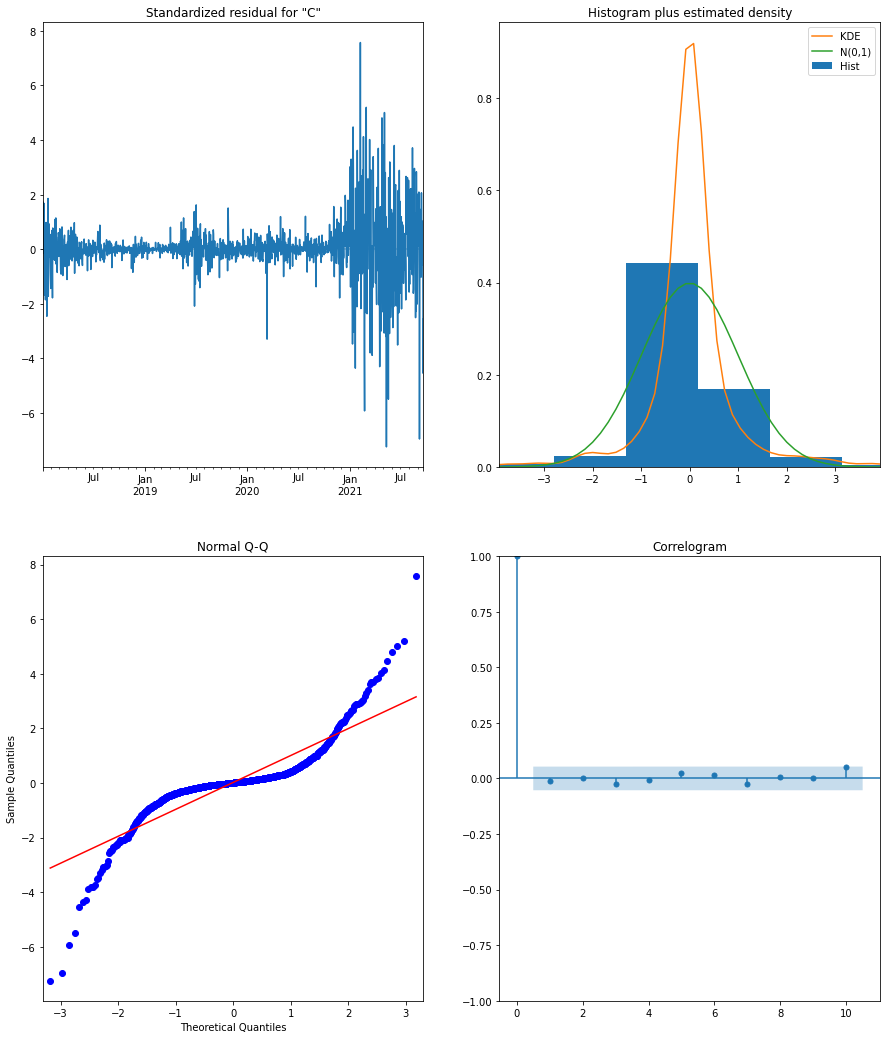

In [127]:
arma_bitcoin.plot_diagnostics(figsize=(15, 18))
plt.show();

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, [1], q))]

In [108]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 2)
pdqs    (0, 1, 2, 6)
aic          22077.9
Name: 20, dtype: object

In [109]:
ARIMA_MODEL = SARIMAX(train_bitcoin, 
                      order=(0, 1, 2), 
                      seasonal_order=(0, 1, 2, 6), 
                      enforce_stationarity=False, 
                      enforce_invertibility=False).fit()

y_hat_arima = ARIMA_MODEL.predict(typ='levels')
y_hat_arima

2018-01-01        0.000000
2018-01-02    13657.200195
2018-01-03    14958.505694
2018-01-04    15226.920726
2018-01-05    15597.800573
                  ...     
2021-09-17    47998.963227
2021-09-18    47353.111511
2021-09-19    48157.721070
2021-09-20    47480.826056
2021-09-21    43143.146136
Freq: D, Name: predicted_mean, Length: 1360, dtype: float64

In [110]:
ARIMA_MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                 1360
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 6)   Log Likelihood              -11033.963
Date:                           Mon, 29 Aug 2022   AIC                          22077.926
Time:                                   06:27:28   BIC                          22103.921
Sample:                               01-01-2018   HQIC                         22087.666
                                    - 09-21-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0605      0.016     -3.810      0.000      -0.092      -0.029
ma.L2          0.0781      0.015      5.328      0.000       0.049       0.107
ma.S.L6       -0.9509      0.019    -50.992      0.000      -0.988      -0.914
ma.S.L12      -0.0490      0.014     -3.555      0.000      -0.076      -0.022
sigma2      8.343e+05   2.18e-08   3.84e+13      0.000    8.34e+05    8.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12317.37
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              27.35   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+28. Standard errors may be unstable.
"""

In [111]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_arima))

1034.2908682839377

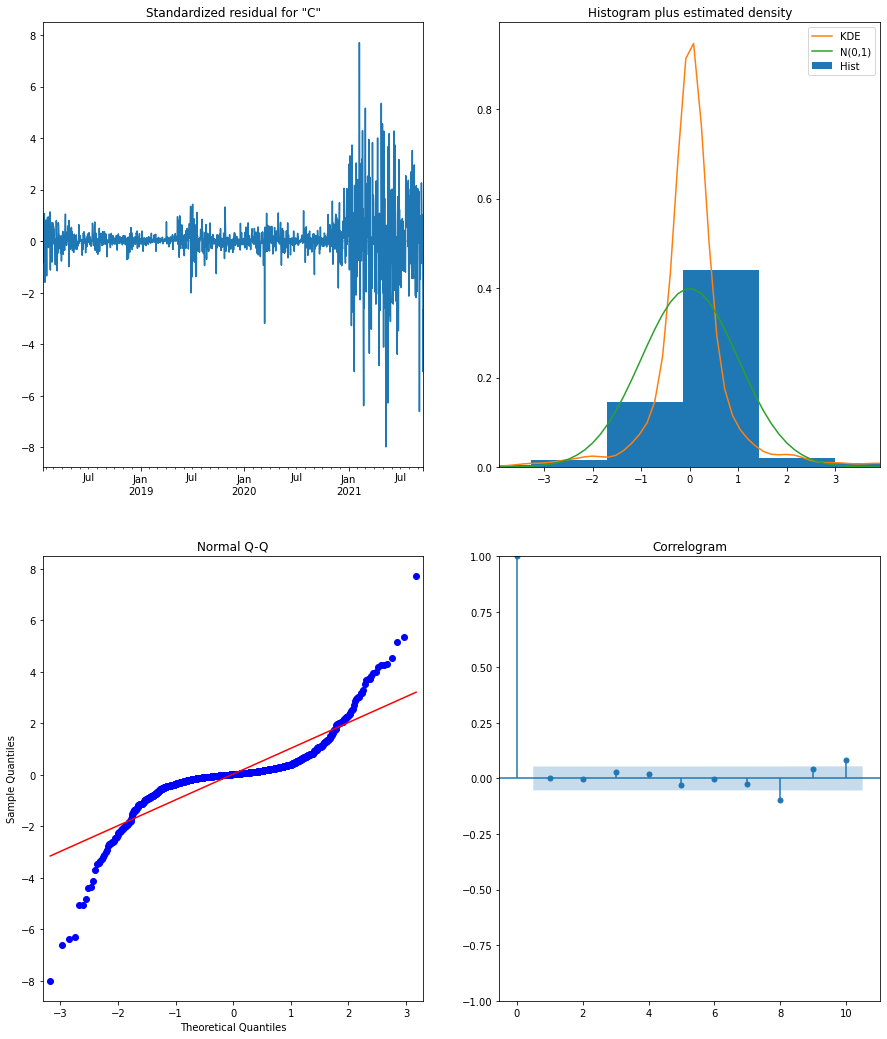

In [113]:
ARIMA_MODEL.plot_diagnostics(figsize=(15, 18))
plt.show();

In [128]:
print(random_walk_model_bitcoin.aic)
print(ar_8_bitcoin.aic)
print(ar_12_bitcoin.aic)
print(ma_8_bitcoin.aic)
print(ma_12_bitcoin.aic)
print(arma_model_bitcoin.aic)
print(arma_bitcoin.aic)
print(ARIMA_MODEL.aic)

22406.11206801693
22394.535586651567
22377.86548740211
22390.83136921785
22385.774262391
22342.412746290924
22331.107145482034
22077.926379024684


In [129]:
print(find_rmse(random_walk_model_bitcoin))
print(find_rmse(ar_8_bitcoin))
print(find_rmse(ar_12_bitcoin))
print(find_rmse(ma_8_bitcoin))
print(find_rmse(ma_12_bitcoin))
print(find_rmse(arma_model_bitcoin))
print(find_rmse(arma_bitcoin))
print(find_rmse(ARIMA_MODEL))

991.0453092619374
982.4560180389407
974.8682612275045
981.3129242799478
977.2683883407004
956.8258770922101
958.6401843795355
1034.2908682839377


In [75]:
bitcoin = df['Close Bitcoin']
bitcoin.head()

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
Name: Close Bitcoin, dtype: float64

In [79]:
bitcoin_weekly = bitcoin.resample('W').asfreq()
bitcoin_weekly.head()

Date
2018-01-07    16477.599609
2018-01-14    13772.000000
2018-01-21    11600.099609
2018-01-28    11786.299805
2018-02-04     8277.009766
Freq: W-SUN, Name: Close Bitcoin, dtype: float64

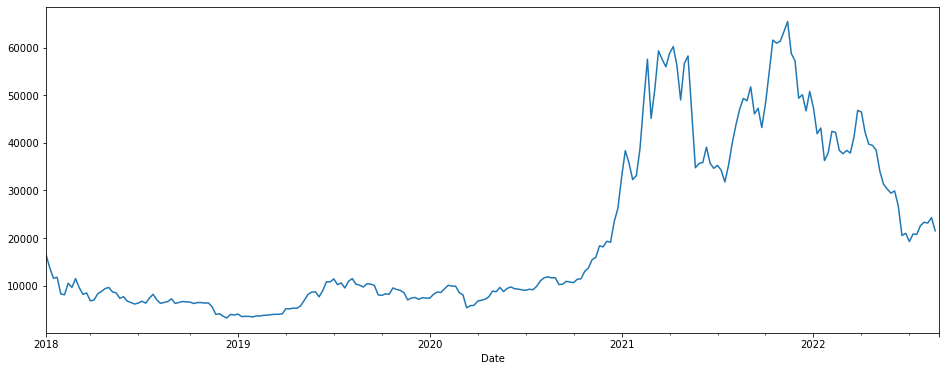

In [80]:
bitcoin_weekly.plot(figsize=(16,6));

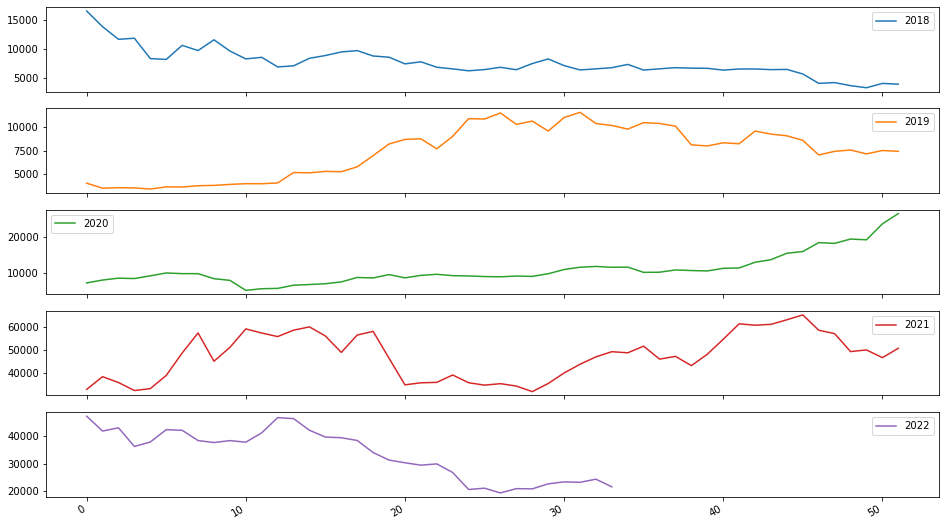

In [130]:
groups_yearly_w = bitcoin_weekly.groupby(pd.Grouper(freq='A'))
year_bitcoin_w = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly_w], axis=1)
year_df_bitcoin_w = pd.DataFrame(year_bitcoin_w)
year_df_bitcoin_w.columns = ['2018', '2019', '2020', '2021', '2022']
year_df_bitcoin_w.plot(figsize=(16,10), subplots=True, legend=True);

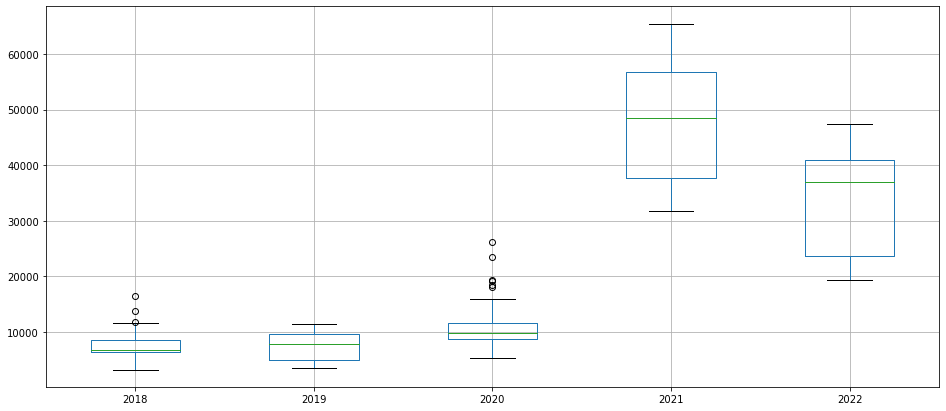

In [131]:
year_df_bitcoin_w.boxplot(figsize=(16,7));

194


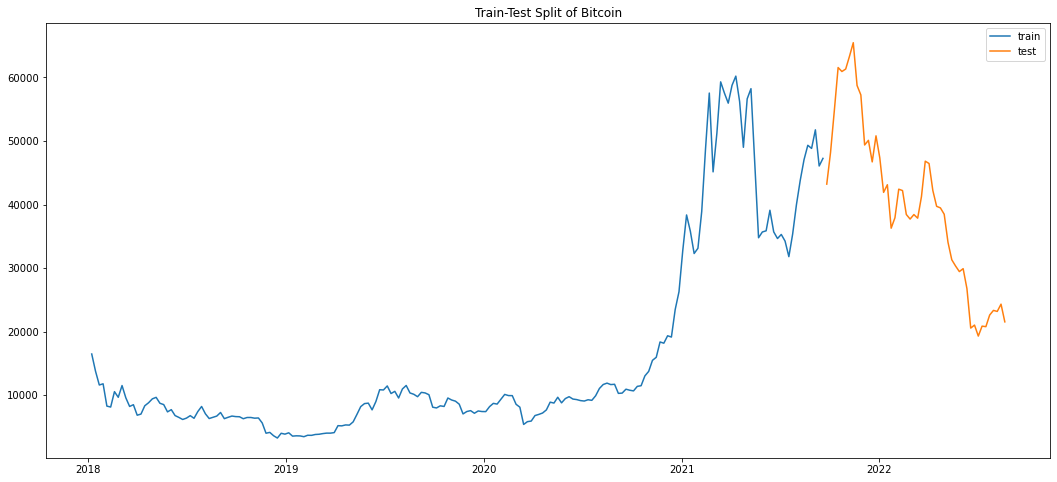

In [85]:
cutoff_bitcoin_w = round(bitcoin_weekly.shape[0]*0.8)
print(cutoff_bitcoin_w)
train_bitcoin_w = bitcoin_weekly[:cutoff_bitcoin_w]
test_bitcoin_w = bitcoin_weekly[cutoff_bitcoin_w:]
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(train_bitcoin_w, label='train')
ax.plot(test_bitcoin_w, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

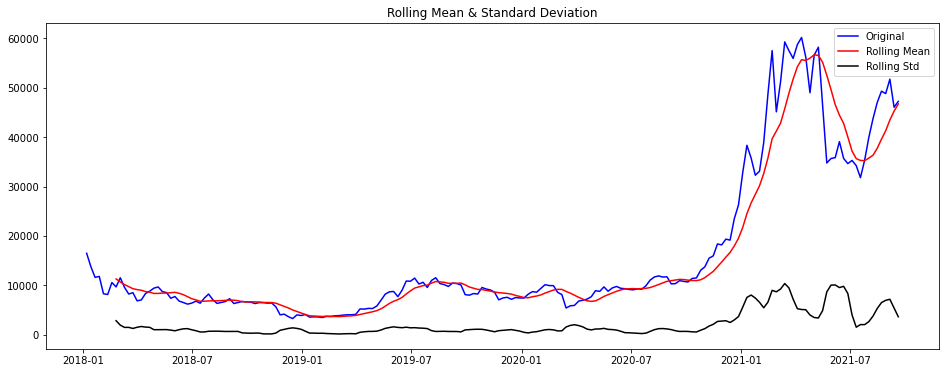

Results of Dickey-Fuller Test: 

Test Statistic                   0.521222
p-value                          0.985504
#Lags Used                      15.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [86]:
stationarity_check(train_bitcoin_w)

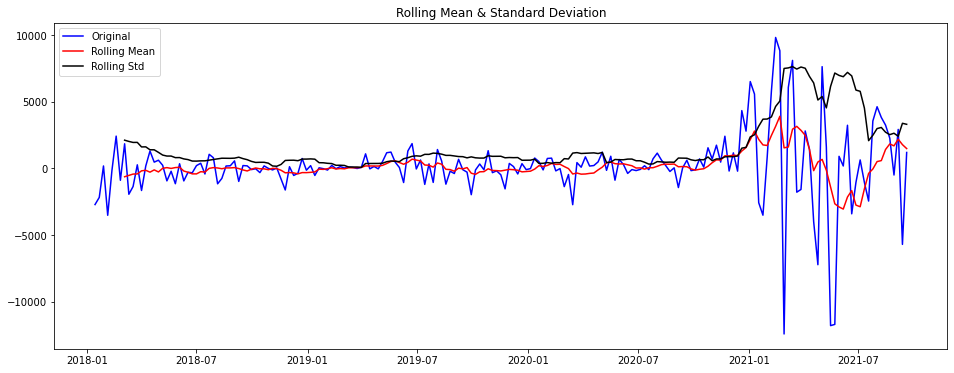

Results of Dickey-Fuller Test: 

Test Statistic                  -4.380795
p-value                          0.000321
#Lags Used                      15.000000
Number of Observations Used    177.000000
Critical Value (1%)             -3.467845
Critical Value (5%)             -2.878012
Critical Value (10%)            -2.575551
dtype: float64


In [87]:
bitcoin_train_diff_w = train_bitcoin_w.diff(periods=1)
bitcoin_train_diff_w.dropna(inplace=True)
stationarity_check(bitcoin_train_diff_w)

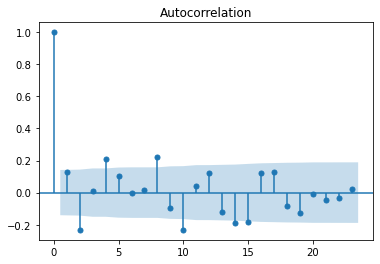

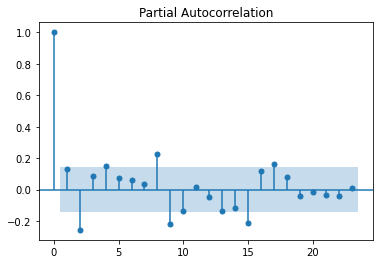

In [88]:
plot_acf(bitcoin_train_diff_w)
plot_pacf(bitcoin_train_diff_w);

In [89]:
ar_2_bitcoin_w = ARIMA(train_bitcoin_w, order=(2,1,0)).fit()
y_hat_ar2 = ar_2_bitcoin_w.predict(typ='levels')
y_hat_ar2

Date
2018-01-07        0.000000
2018-01-14    17893.013690
2018-01-21    10063.452095
2018-01-28    11976.241790
2018-02-04    12325.187406
                  ...     
2021-08-22    46537.565896
2021-08-29    48829.046222
2021-09-05    48229.005764
2021-09-12    52229.244104
2021-09-19    44669.969326
Freq: W-SUN, Name: predicted_mean, Length: 194, dtype: float64

In [90]:
ar_2_bitcoin_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                  194
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1781.131
Date:                Mon, 29 Aug 2022   AIC                           3568.261
Time:                        06:06:05   BIC                           3578.050
Sample:                    01-07-2018   HQIC                          3572.225
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1228      0.025      4.887      0.000       0.074       0.172
ar.L2         -0.2376      0.032     -7.335      0.000      -0.301      -0.174
sigma2      6.027e+06   2.91e+05     20.689      0.000    5.46e+06     6.6e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               436.86
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              14.60   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
np.sqrt(mean_squared_error(train_bitcoin_w, y_hat_ar2))

2728.470468430549

In [92]:
split = TimeSeriesSplit()
for train_ind_w, val_ind_w in split.split(train_bitcoin_w):
    print(train_ind_w, val_ind_w)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65] [66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89
 90 91 92 93 94 95 96 97]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97] [ 98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15

In [94]:
for train_ind_w, val_ind_w in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind_w, -1], order=(2,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind_w[0], end=val_ind_w[-1])
    true = train_bitcoin_with_ind.iloc[val_ind_w, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2018.7067094628928
5064.180220571916
1366.1387768379143
12237.389175503173
11619.692140668396


In [95]:
ma_2_bitcoin_w = ARIMA(train_bitcoin_w, order=(0,1,2)).fit()
y_hat_ma2 = ma_2_bitcoin_w.predict(typ='levels')
y_hat_ma2

Date
2018-01-07        0.000000
2018-01-14    18002.246889
2018-01-21    10740.301940
2018-01-28    12464.924532
2018-02-04    11535.989827
                  ...     
2021-08-22    46774.131636
2021-08-29    49048.679165
2021-09-05    48329.009078
2021-09-12    52265.897818
2021-09-19    44575.575205
Freq: W-SUN, Name: predicted_mean, Length: 194, dtype: float64

In [96]:
ma_2_bitcoin_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                  194
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1781.910
Date:                Mon, 29 Aug 2022   AIC                           3569.821
Time:                        06:12:23   BIC                           3579.609
Sample:                    01-07-2018   HQIC                          3573.785
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1379      0.028      4.878      0.000       0.082       0.193
ma.L2         -0.1848      0.035     -5.327      0.000      -0.253      -0.117
sigma2      6.194e+06   2.97e+05     20.865      0.000    5.61e+06    6.78e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               506.12
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              16.59   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
np.sqrt(mean_squared_error(train_bitcoin_w, y_hat_ma2))

2737.2267834246063

In [98]:
for train_ind_w, val_ind_w in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind_w, -1], order=(0,1,2)).fit()
    preds = ar.predict(typ='levels', start=val_ind_w[0], end=val_ind_w[-1])
    true = train_bitcoin_with_ind.iloc[val_ind_w, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2018.2407902244054
5064.856505780903
1366.174561106782
12237.553654030107
11615.122537174064


In [99]:
arma_22_bitcoin_w = ARIMA(train_bitcoin_w, order=(2,1,2)).fit()
y_hat_arma22 = arma_22_bitcoin_w.predict(typ='levels')
y_hat_arma22

Date
2018-01-07        0.000000
2018-01-14    17390.800618
2018-01-21    10943.122616
2018-01-28    11668.005826
2018-02-04    13994.535415
                  ...     
2021-08-22    47350.160605
2021-08-29    49789.698020
2021-09-05    48228.568414
2021-09-12    51794.106698
2021-09-19    45652.923650
Freq: W-SUN, Name: predicted_mean, Length: 194, dtype: float64

In [100]:
arma_22_bitcoin_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                  194
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1779.630
Date:                Mon, 29 Aug 2022   AIC                           3569.259
Time:                        06:13:55   BIC                           3585.573
Sample:                    01-07-2018   HQIC                          3575.866
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0474      0.071     -0.667      0.505      -0.187       0.092
ar.L2         -0.8145      0.078    -10.467      0.000      -0.967      -0.662
ma.L1          0.1232      0.084      1.474      0.141      -0.041       0.287
ma.L2          0.6829      0.099      6.887      0.000       0.489       0.877
sigma2      6.059e+06   3.04e+05     19.923      0.000    5.46e+06    6.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):               435.79
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              11.68   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
np.sqrt(mean_squared_error(train_bitcoin_w, y_hat_arma22))

2711.041373665301

In [102]:
for train_ind_w, val_ind_w in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind_w, -1], order=(2,1,2)).fit()
    preds = ar.predict(typ='levels', start=val_ind_w[0], end=val_ind_w[-1])
    true = train_bitcoin_with_ind.iloc[val_ind_w, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

2027.2444326768157
5042.4387759138235
1324.868494015901
12218.09898102486
14080.704990848033


In [116]:
p = q = range(0, 11)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_bitcoin_w,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (9, 1, 7)
aic      3544.04
Name: 106, dtype: object

In [117]:
best_bitcoin_w = ARIMA(train_bitcoin_w, order=(9,1,7)).fit()
y_hat_best = best_bitcoin_w.predict(typ='levels')
y_hat_best

Date
2018-01-07        0.000000
2018-01-14    17712.461485
2018-01-21    10293.521942
2018-01-28    12884.663122
2018-02-04    13226.345165
                  ...     
2021-08-22    47141.096977
2021-08-29    50984.788898
2021-09-05    50646.896197
2021-09-12    51233.326733
2021-09-19    47054.593483
Freq: W-SUN, Name: predicted_mean, Length: 194, dtype: float64

In [118]:
best_bitcoin_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                  194
Model:                 ARIMA(9, 1, 7)   Log Likelihood               -1755.020
Date:                Mon, 29 Aug 2022   AIC                           3544.041
Time:                        06:35:12   BIC                           3599.506
Sample:                    01-07-2018   HQIC                          3566.502
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4129      0.148      2.792      0.005       0.123       0.703
ar.L2         -0.5379      0.128     -4.188      0.000      -0.790      -0.286
ar.L3          0.2215      0.149      1.488      0.137      -0.070       0.513
ar.L4         -0.0181      0.145     -0.125      0.900      -0.302       0.266
ar.L5          0.1338      0.166      0.807      0.420      -0.191       0.459
ar.L6          0.2161      0.196      1.104      0.270      -0.168       0.600
ar.L7         -0.5200      0.143     -3.625      0.000      -0.801      -0.239
ar.L8          0.3470      0.070      4.963      0.000       0.210       0.484
ar.L9         -0.3828      0.063     -6.122      0.000      -0.505      -0.260
ma.L1         -0.3417      0.139     -2.463      0.014      -0.614      -0.070
ma.L2          0.3441      0.140      2.462      0.014       0.070       0.618
ma.L3         -0.0592      0.153     -0.387      0.699      -0.359       0.241
ma.L4          0.0322      0.155      0.207      0.836      -0.272       0.337
ma.L5         -0.0489      0.175     -0.280      0.780      -0.392       0.294
ma.L6         -0.0282      0.178     -0.158      0.874      -0.377       0.321
ma.L7          0.5967      0.145      4.112      0.000       0.312       0.881
sigma2      4.929e+06   1.65e-07   2.99e+13      0.000    4.93e+06    4.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):               420.88
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               7.52   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.63e+28. Standard errors may be unstable.
"""

In [119]:
np.sqrt(mean_squared_error(train_bitcoin_w, y_hat_best))

2441.9973071524623

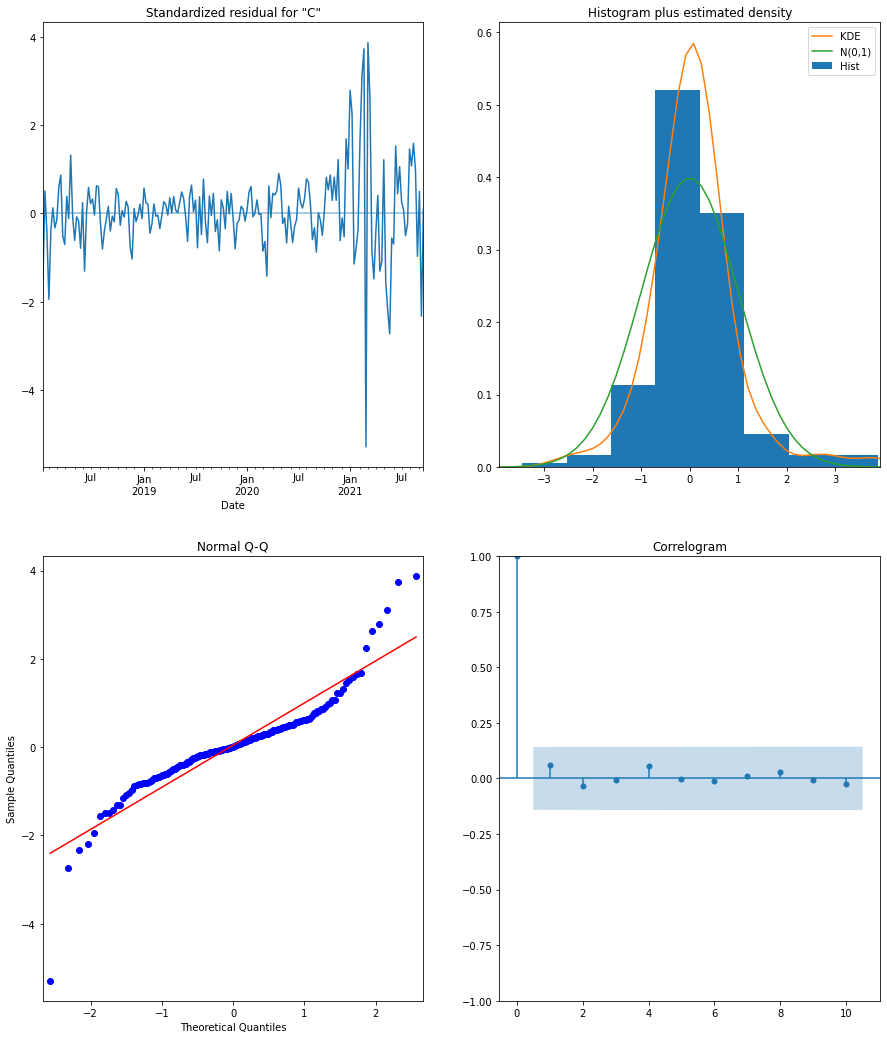

In [120]:
best_bitcoin_w.plot_diagnostics(figsize=(15, 18))
plt.show();

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, [1], q))]

In [133]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin_w,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (2, 1, 2)
pdqs    (0, 1, 2, 6)
aic           3196.3
Name: 74, dtype: object

In [134]:
ARIMA_MODEL_W = SARIMAX(train_bitcoin_w, 
                        order=(2, 1, 2), 
                        seasonal_order=(0, 1, 2, 6), 
                        enforce_stationarity=False, 
                        enforce_invertibility=False).fit()

y_hat_arima_w = ARIMA_MODEL_W.predict(typ='levels')
y_hat_arima_w

Date
2018-01-07        0.000000
2018-01-14    16523.347682
2018-01-21     8418.042422
2018-01-28    12598.004481
2018-02-04    15654.789586
                  ...     
2021-08-22    47432.499899
2021-08-29    50616.854929
2021-09-05    49630.260013
2021-09-12    53468.972428
2021-09-19    48526.342780
Freq: W-SUN, Name: predicted_mean, Length: 194, dtype: float64

In [135]:
ARIMA_MODEL_W.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                  194
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 6)   Log Likelihood               -1591.151
Date:                           Tue, 30 Aug 2022   AIC                           3196.303
Time:                                   06:15:10   BIC                           3218.335
Sample:                               01-07-2018   HQIC                          3205.242
                                    - 09-19-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0083      0.037      0.224      0.822      -0.064       0.081
ar.L2         -0.9520      0.039    -24.354      0.000      -1.029      -0.875
ma.L1          0.0480      0.060      0.795      0.427      -0.070       0.166
ma.L2          0.6423      0.073      8.745      0.000       0.498       0.786
ma.S.L6       -0.4204      0.077     -5.453      0.000      -0.571      -0.269
ma.S.L12      -0.4148      0.068     -6.113      0.000      -0.548      -0.282
sigma2      8.139e+06   4.96e-09   1.64e+15      0.000    8.14e+06    8.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):               110.64
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):              13.53   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.71e+30. Standard errors may be unstable.
"""

In [136]:
np.sqrt(mean_squared_error(train_bitcoin_w, y_hat_arima_w))

2828.759131053044

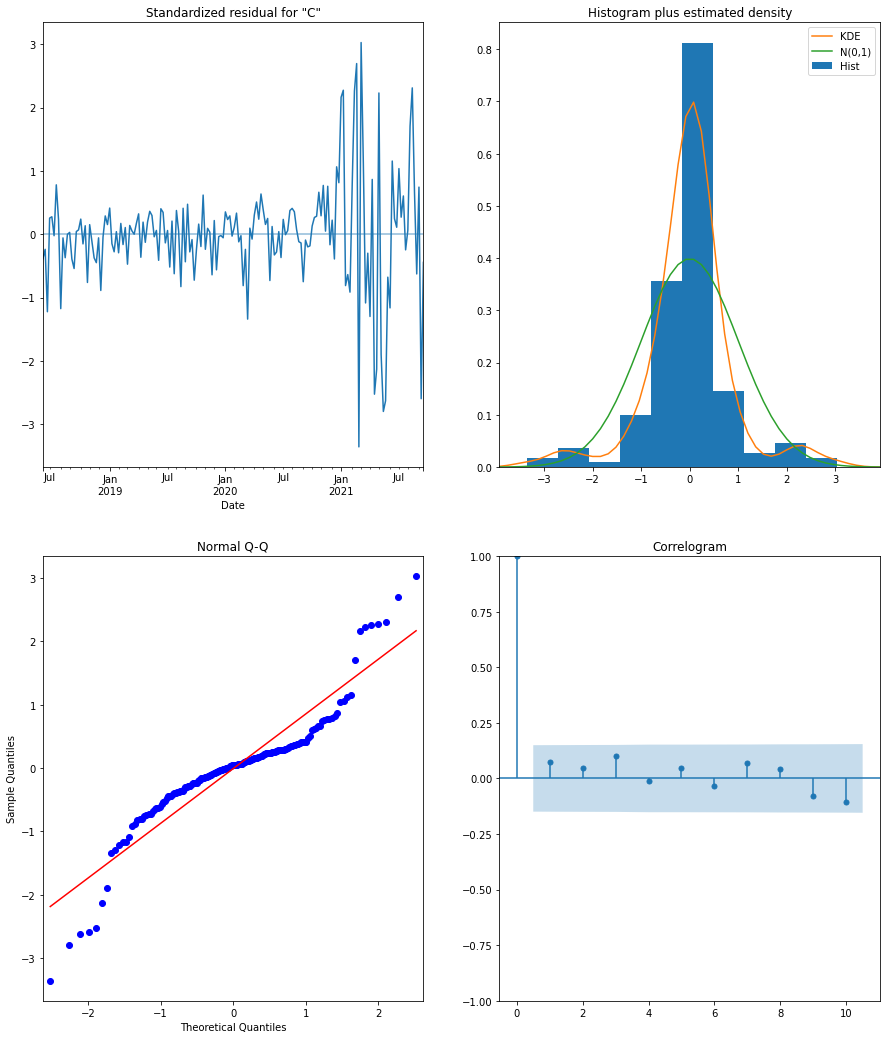

In [138]:
ARIMA_MODEL_W.plot_diagnostics(figsize=(15, 18))
plt.show();

In [139]:
train_bitcoin_w.describe()

count      194.000000
mean     15715.134340
std      15269.398956
min       3252.839111
25%       6875.945434
50%       9210.585938
75%      13560.625488
max      60204.964844
Name: Close Bitcoin, dtype: float64

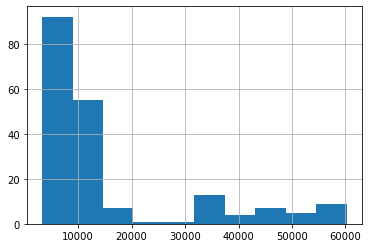

In [145]:
train_bitcoin_w.hist();

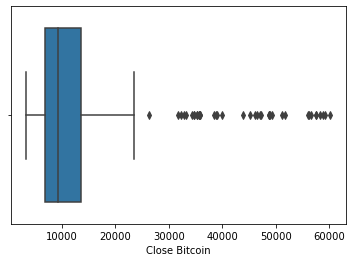

In [143]:
import seaborn as sns
sns.boxplot(train_bitcoin_w);

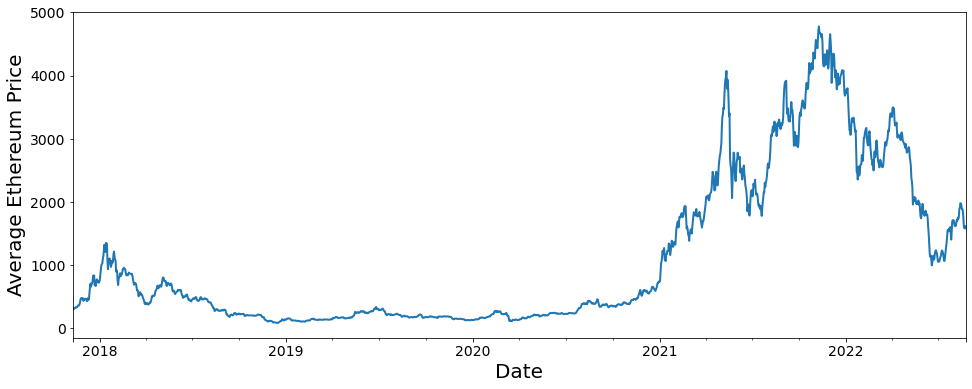

In [120]:
df['Average Price Ethereum'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Ethereum Price', fontsize=20);

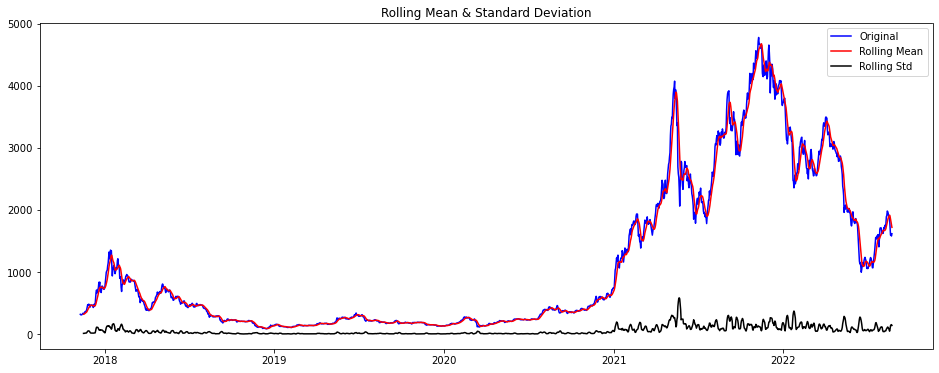

Results of Dickey-Fuller Test: 

Test Statistic                   -1.394762
p-value                           0.584785
#Lags Used                        8.000000
Number of Observations Used    1740.000000
Critical Value (1%)              -3.434114
Critical Value (5%)              -2.863202
Critical Value (10%)             -2.567655
dtype: float64


In [128]:
stationarity_check(df['Average Price Ethereum'])

 not stationary

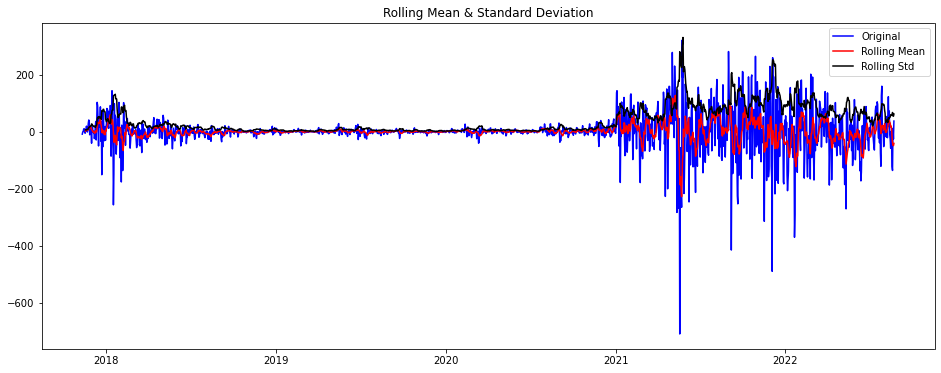

Results of Dickey-Fuller Test: 

Test Statistic                -7.382072e+00
p-value                        8.421422e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.722000e+03
Critical Value (1%)           -3.434153e+00
Critical Value (5%)           -2.863220e+00
Critical Value (10%)          -2.567664e+00
dtype: float64


In [129]:
ethereum_diff = df['Average Price Ethereum'].diff(periods=1)
ethereum_diff.dropna(inplace=True)
stationarity_check(ethereum_diff)

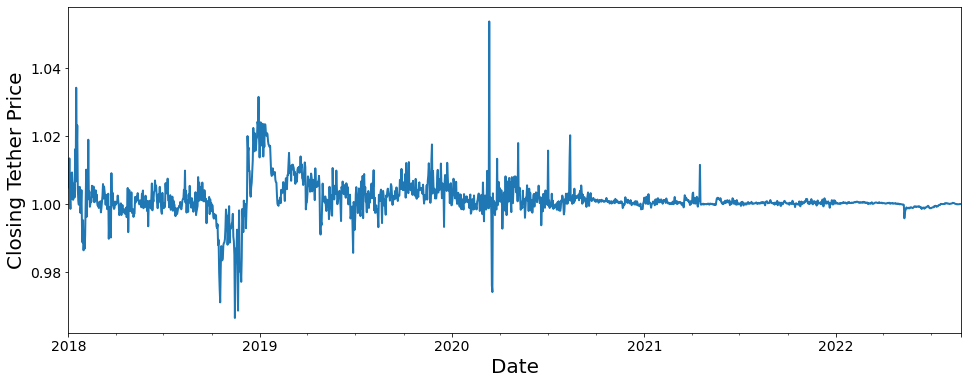

In [115]:
df['Close Tether'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Tether Price', fontsize=20);

In [7]:
year_groups = tether_df.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
tether_annual = pd.DataFrame()

for yr, group in year_groups:
    tether_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
tether_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (365) does not match length of index (53)

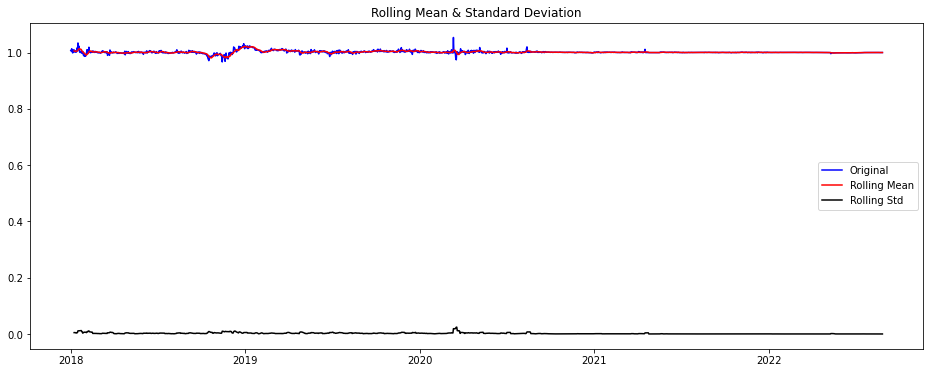

Results of Dickey-Fuller Test: 

Test Statistic                -6.102470e+00
p-value                        9.760752e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.693000e+03
Critical Value (1%)           -3.434218e+00
Critical Value (5%)           -2.863249e+00
Critical Value (10%)          -2.567680e+00
dtype: float64


In [117]:
stationarity_check(df['Close Tether'])

Tether is stationary (test statistic is less than critical value)

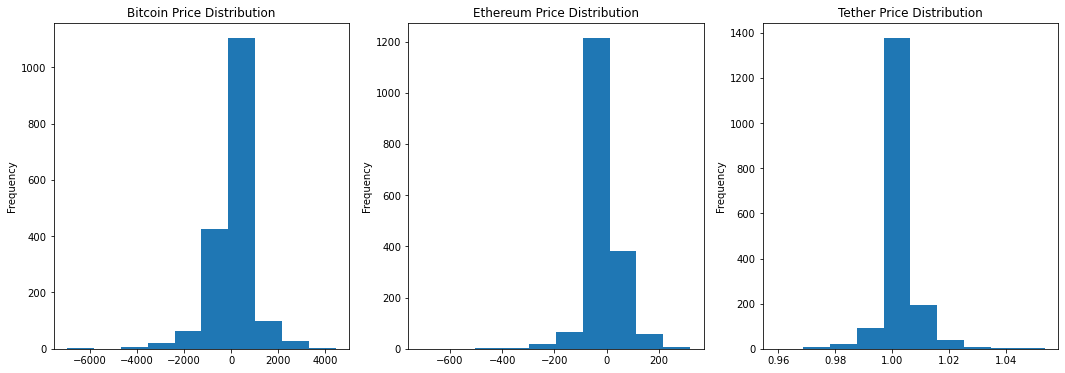

In [132]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='hist', ax=axes[0])
axes[0].set_title('Bitcoin Price Distribution')
ethereum_diff.plot(kind='hist', ax=axes[1])
axes[1].set_title('Ethereum Price Distribution')
df['Average Price Tether'].plot(kind='hist', ax=axes[2])
axes[2].set_title('Tether Price Distribution');

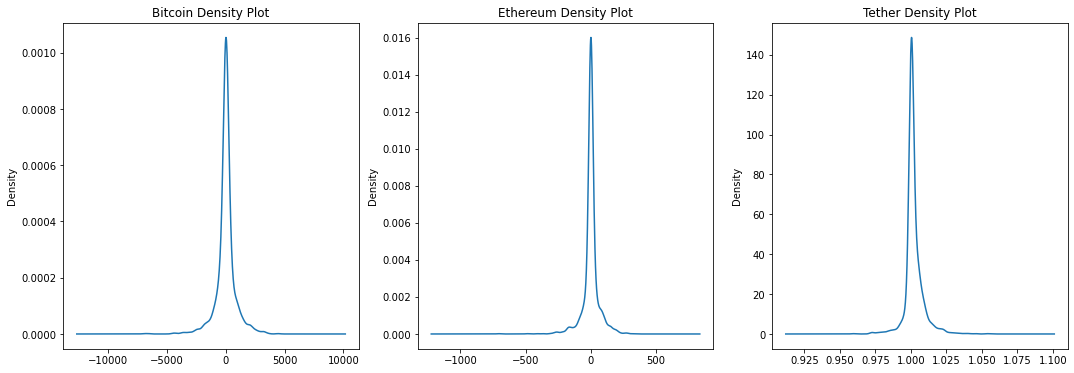

In [133]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
ethereum_diff.plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Average Price Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

Nothing is white noise process since mean and std are not constant over time

In [137]:
bitcoin = pd.DataFrame(bitcoin_diff)
ethereum = pd.DataFrame(ethereum_diff)
final_df = bitcoin.join(
    ethereum, how='outer', rsuffix=' Ethereum').join(
    df['Average Price Tether'], how='outer', rsuffix=' Tether')
final_df.dropna(inplace=True)
final_df

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Date,,,
2017-11-10,-399.739990,-8.624009,1.009858
2017-11-11,-335.750000,-0.807495,1.011005
2017-11-12,-466.655273,0.010513,1.036755
2017-11-13,255.710205,8.886994,1.002197
2017-11-14,285.625000,10.750000,1.005164
...,...,...,...
2022-08-19,-1329.636719,-122.450257,1.000061
2022-08-20,-937.311523,-135.958313,1.000053
2022-08-21,282.252930,11.732727,1.000052


In [138]:
final_df.corr()

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Average Price Bitcoin,1.000000,0.754439,-0.001664
Average Price Ethereum,0.754439,1.000000,0.019570
Average Price Tether,-0.001664,0.019570,1.000000


The average price for ethereum and bitcoin are highly correlated

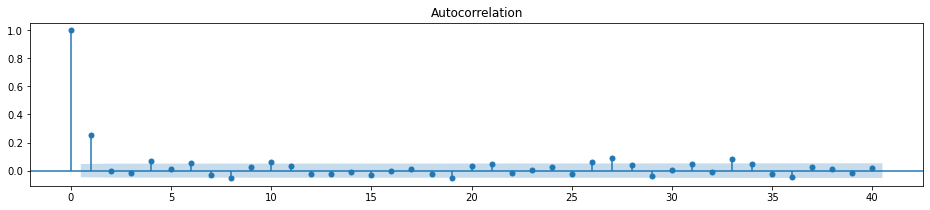

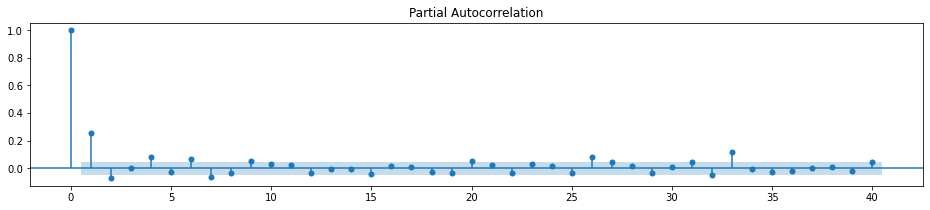

In [157]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Bitcoin'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Bitcoin'], ax=ax, lags=40);

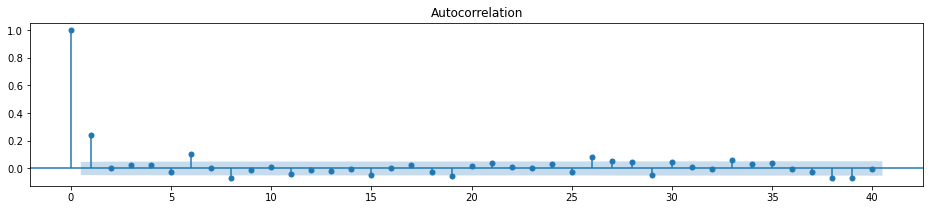

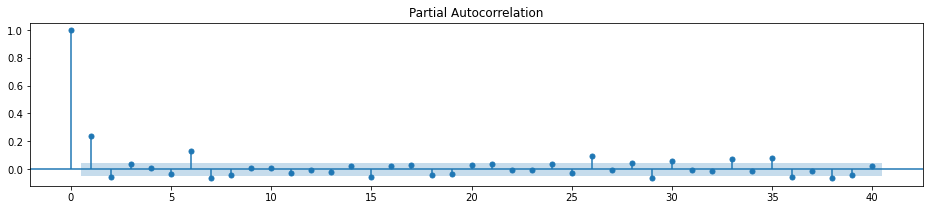

In [158]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Ethereum'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Ethereum'], ax=ax, lags=40);

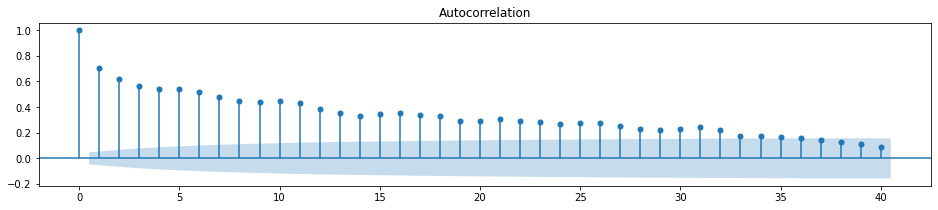

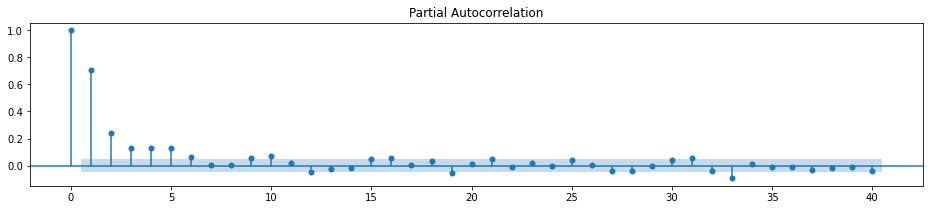

In [159]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Tether'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Tether'], ax=ax, lags=40);